In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as s
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import itertools
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import LocallyLinearEmbedding

In [2]:
data = pd.read_csv(r'C:\datasets\water_potability.csv')
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [5]:
print("The Mean PH is: ", s.mean(data['ph']))

The Mean PH is:  nan


In [3]:
# This blocck of code is to check the amount of null values we have in the data
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<Axes: >

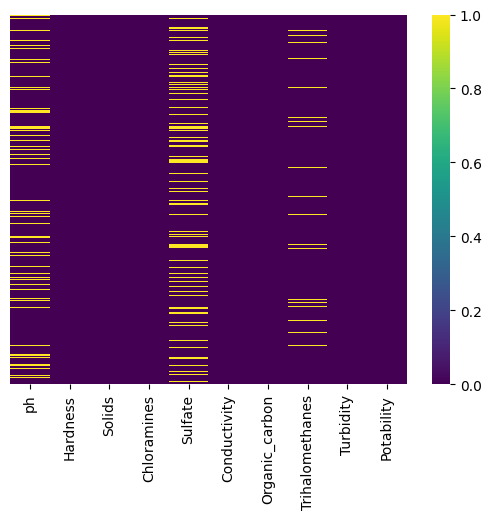

In [4]:
# Heatmap for the null values
sns.heatmap(data.isnull(), yticklabels=False, cmap='viridis')

In [5]:
# dropping the null values
data.dropna(inplace=True)

In [6]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


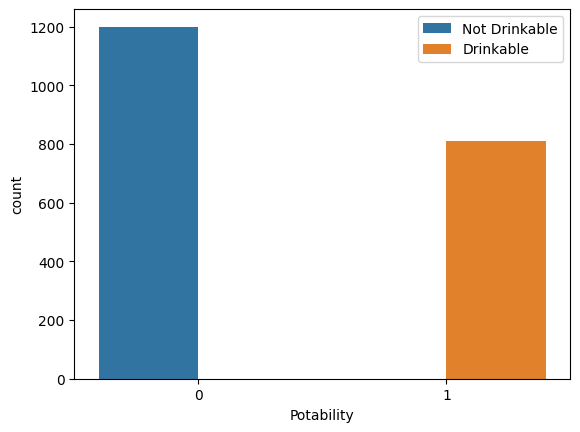

In [8]:
sns.countplot(data=data, x= 'Potability', hue= 'Potability')
plt.legend(labels= ['Not Drinkable', 'Drinkable'])

<Axes: >

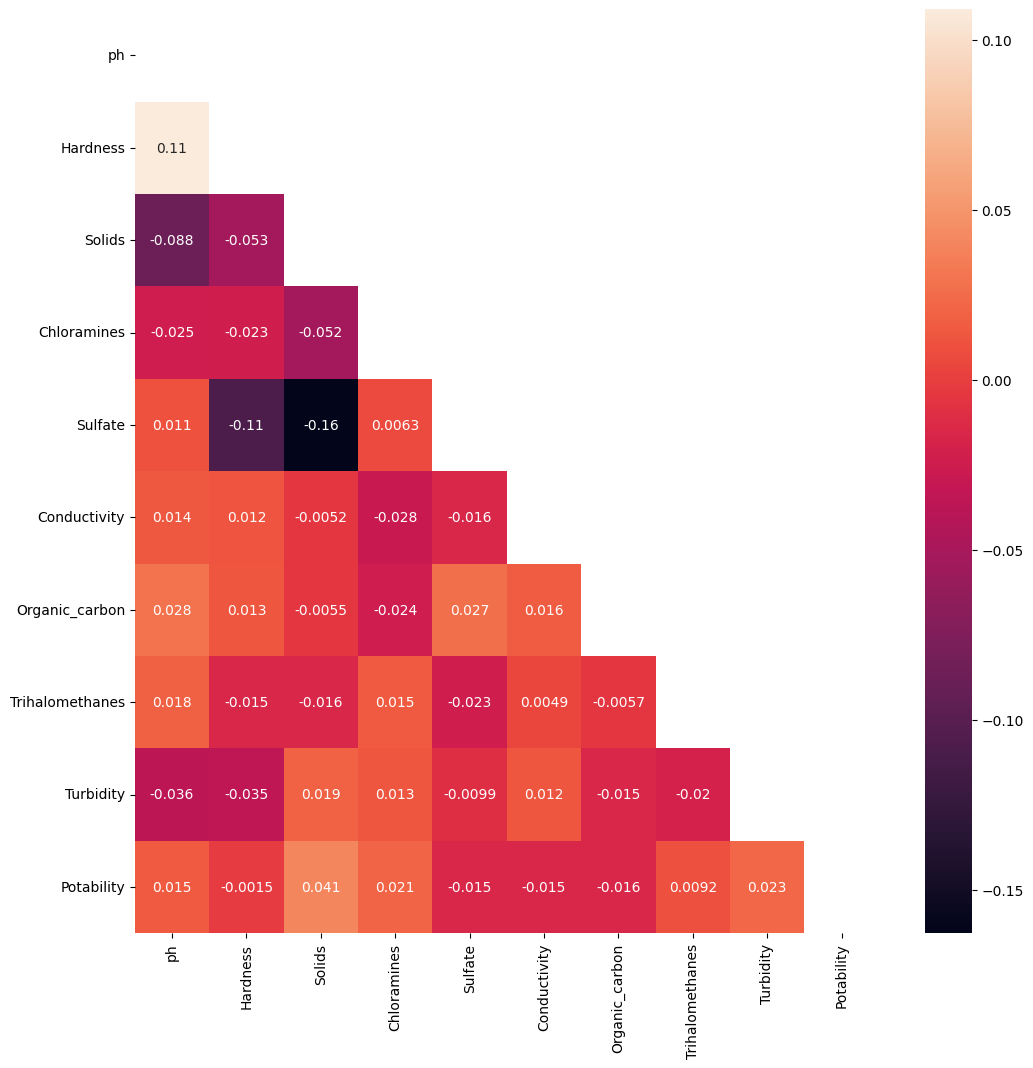

In [9]:
cor = data.corr()
m = np.triu(cor)
plt.figure(figsize = (12,12))
sns.heatmap(cor, annot= True, mask =m)

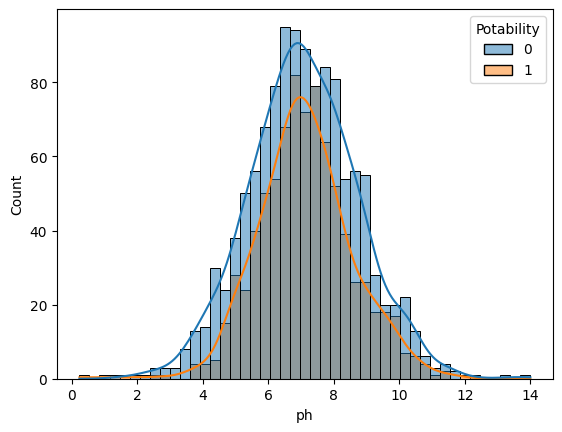

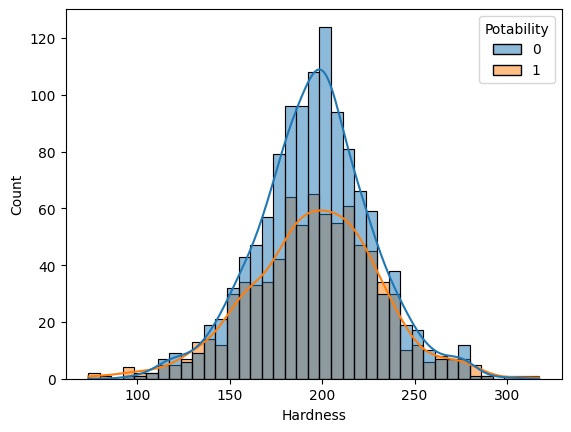

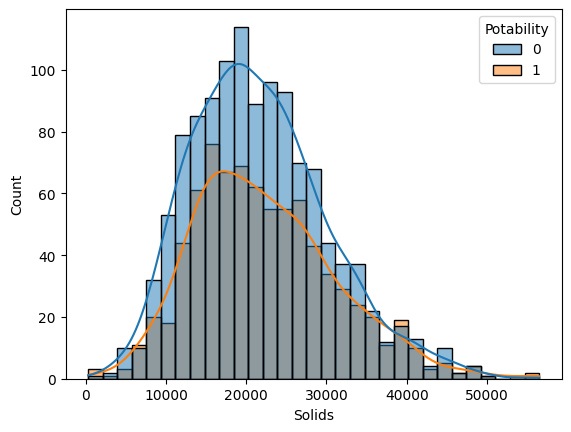

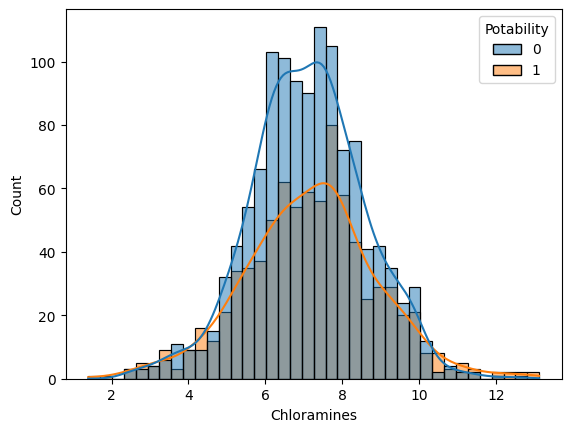

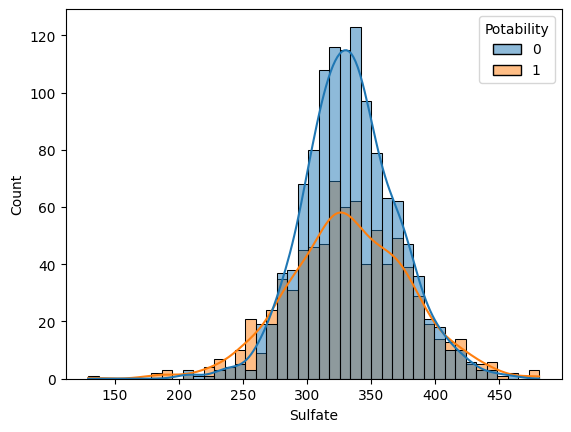

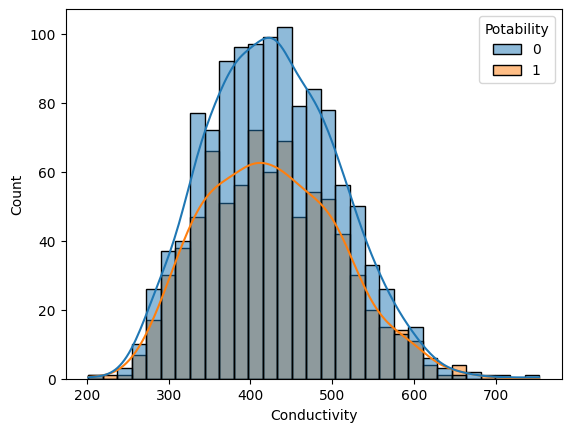

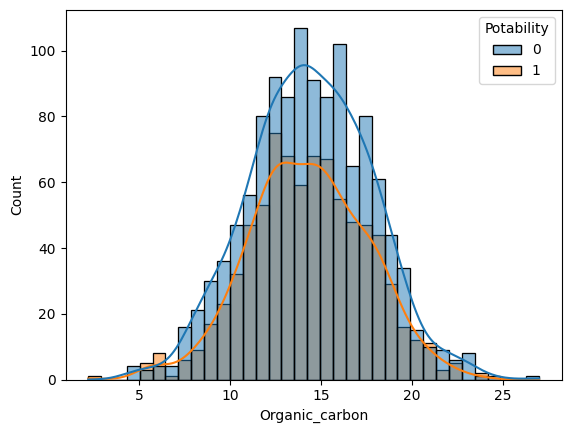

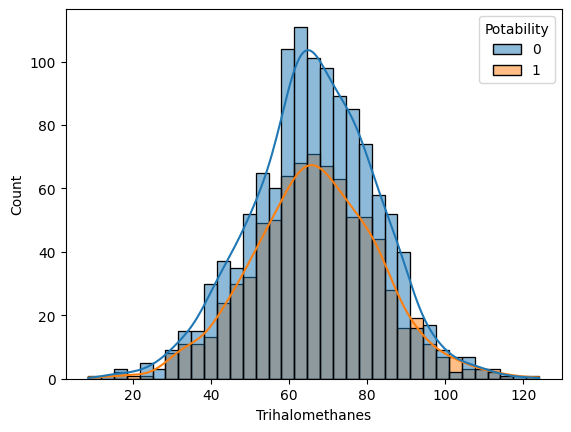

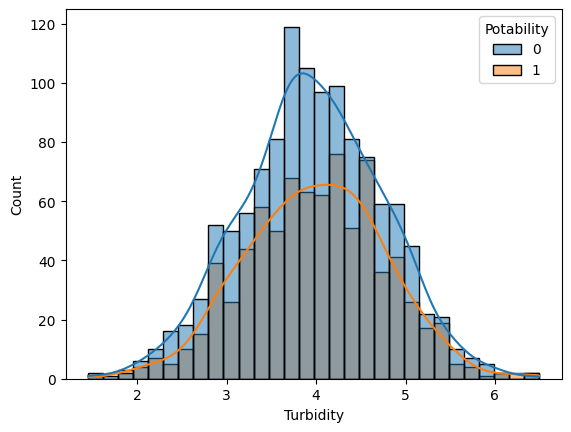

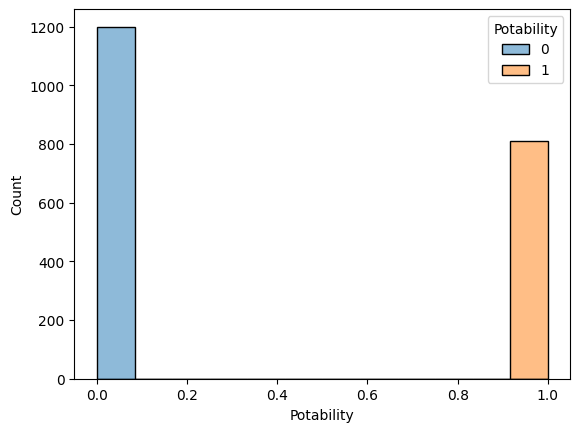

In [10]:
for col in data.columns:
    sns.histplot(data=data, x=col, kde = 'True',  hue= 'Potability')
    plt.show()

In [11]:
X = data.drop(['Potability'], axis=1).values
Y = data['Potability'].values
X

array([[8.31676588e+00, 2.14373394e+02, 2.20184174e+04, ...,
        1.84365245e+01, 1.00341674e+02, 4.62877054e+00],
       [9.09222346e+00, 1.81101509e+02, 1.79789863e+04, ...,
        1.15582794e+01, 3.19979927e+01, 4.07507543e+00],
       [5.58408664e+00, 1.88313324e+02, 2.87486877e+04, ...,
        8.39973464e+00, 5.49178618e+01, 2.55970823e+00],
       ...,
       [1.14910109e+01, 9.48125452e+01, 3.71888260e+04, ...,
        1.61727554e+01, 4.15585007e+01, 4.36926431e+00],
       [6.06961576e+00, 1.86659040e+02, 2.61387802e+04, ...,
        1.20676196e+01, 6.04199211e+01, 3.66971170e+00],
       [4.66810169e+00, 1.93681735e+02, 4.75809916e+04, ...,
        1.38944185e+01, 6.66876948e+01, 4.43582091e+00]])

In [12]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)

In [13]:
num_components = 4

pca = PCA(n_components=num_components)
new_x = pca.fit_transform(scaled_x)
new_x

array([[-0.89277496, -0.12034861, -0.69917291, -1.04145704],
       [-0.25428385, -0.28366897,  0.30622222,  1.74243069],
       [ 1.05212008,  0.52176466, -1.49403418, -0.31924489],
       ...,
       [ 1.33775214,  0.013148  ,  0.37562997,  0.53647377],
       [ 0.5763117 ,  0.6414265 , -0.32627289,  0.07213514],
       [ 2.54130082,  0.41842428,  0.97555813, -0.20134739]])

In [27]:
X = data.drop(['Potability'], axis=1).values
Y = data['Potability'].values
X

KeyError: "['Potability'] not found in axis"

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(new_x, Y, test_size=0.3, random_state=42)

In [15]:
model = SVC(kernel='linear', C=4.0)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print(classification_report(y_pred, Y_test))
cm = confusion_matrix(y_pred, Y_test)

              precision    recall  f1-score   support

           0       1.00      0.59      0.74       604
           1       0.00      0.00      0.00         0

    accuracy                           0.59       604
   macro avg       0.50      0.29      0.37       604
weighted avg       1.00      0.59      0.74       604



C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

0.5877483443708609

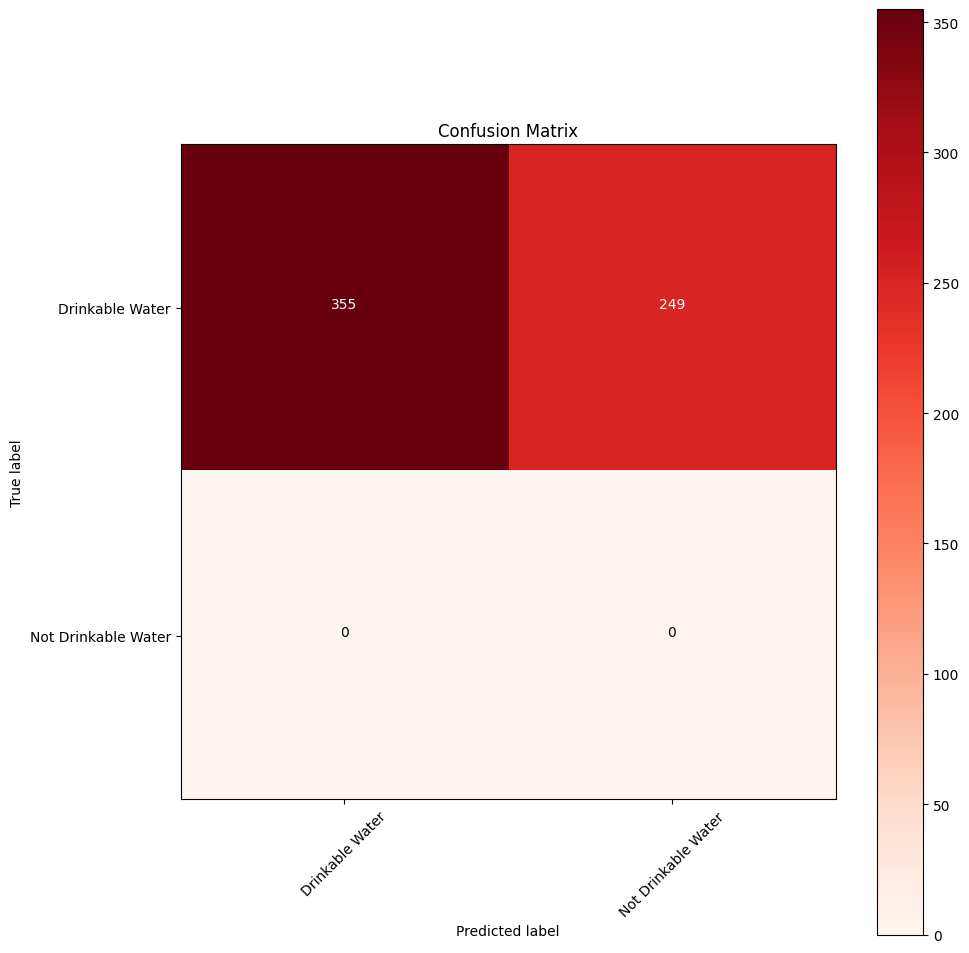

In [18]:
def plot_confusion_matrix1(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Reds):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
target_names = ["Drinkable Water", "Not Drinkable Water"]
plot_confusion_matrix1(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(y_pred, Y_test)

In [21]:
model1 = RandomForestClassifier(n_estimators=200, random_state=42)
model1.fit(X_train, Y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_pred1, Y_test))
cm = confusion_matrix(y_pred1, Y_test)

              precision    recall  f1-score   support

           0       0.70      0.59      0.64       418
           1       0.32      0.42      0.36       186

    accuracy                           0.54       604
   macro avg       0.51      0.51      0.50       604
weighted avg       0.58      0.54      0.56       604



0.5413907284768212

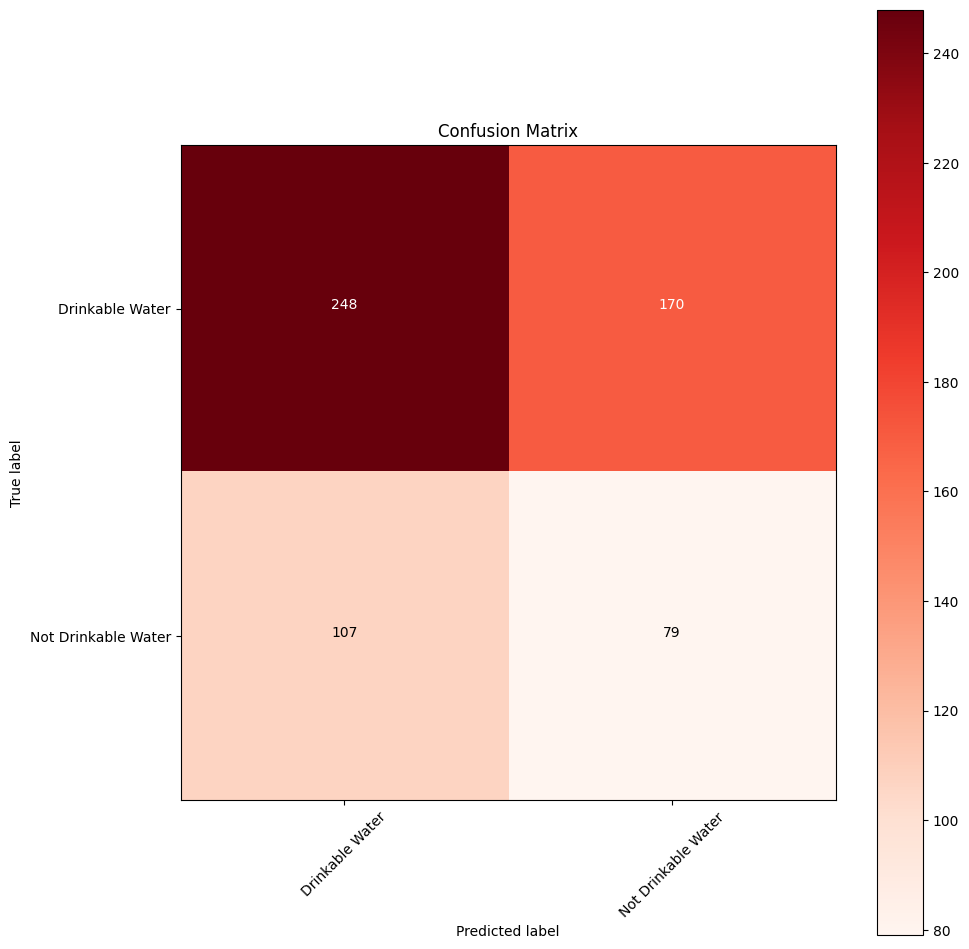

In [22]:
def plot_confusion_matrix1(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Reds):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
target_names = ["Drinkable Water", "Not Drinkable Water"]
plot_confusion_matrix1(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(y_pred1, Y_test)